# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
import seaborn as sns

from scipy.stats import pearsonr
from sklearn import preprocessing

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [69]:
# df.describe()
# df.columns
# df.info()

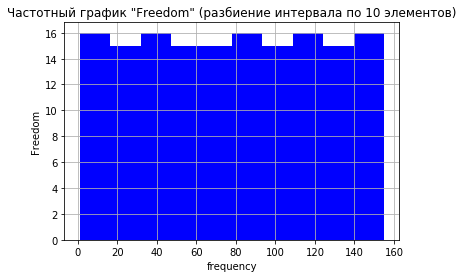

In [4]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график "Freedom" (разбиение интервала по 10 элементов)')
plt.grid()
plt.show()

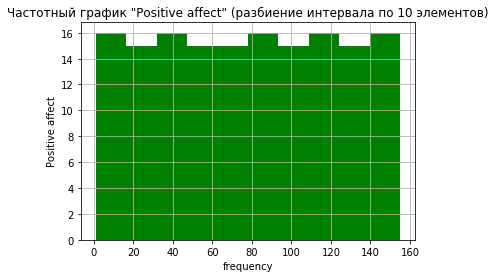

In [5]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график "Positive affect" (разбиение интервала по 10 элементов)')
plt.grid()
plt.show()

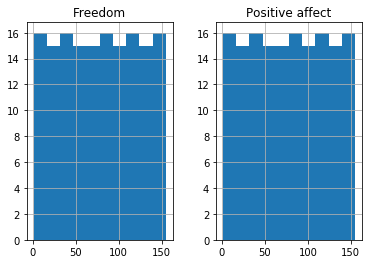

In [6]:
df.hist(column=['Freedom', 'Positive affect'], bins=10)
plt.show()

### Частотные графики "Positive affect" и "Freedom" стремятся к "Равномерному распределению"

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [125]:
freedom = df['Freedom']

median = statistics.median(freedom)
# mode = statistics.mode(freedom)
mean = statistics.mean(freedom)
pstdev = statistics.pstdev(freedom)
pvariance = statistics.pvariance(freedom)
_min = min(freedom)
_max = max(freedom)
miss = freedom.isnull().sum()
_range = max(freedom) - min(freedom)

In [126]:
print('Медиана: ', median)

try:
    print('Мода: ', statistics.mode(freedom))
except statistics.StatisticsError as i:
    if 'no unique mode' in str(i):
        print('Мода: все значения уникальны "no unique mode; found 156 equally common values"')

print('Математическое ожидание: ', mean)
print('Стандартное отклонение: ', pstdev)
print('Дисперсия: ', pvariance)
print('Минимум: ', _min)
print('Максимум: ', _max)
print('Выбросы: ', miss)
print('Размах: ', _range)

Медиана:  71.0
Мода: все значения уникальны "no unique mode; found 156 equally common values"
Математическое ожидание:  nan
Стандартное отклонение:  nan
Дисперсия:  nan
Минимум:  1.0
Максимум:  155.0
Выбросы:  1
Размах:  154.0


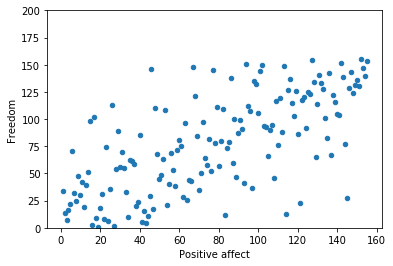

In [127]:
data = pd.concat([df['Freedom'], df['Positive affect']], axis=1)
df.plot.scatter(x='Positive affect', y='Freedom', ylim=(0,200));

### Видим что есть выброс, данные которые мы получили выглядят весьма сомнительно по всей видимости пустые значения повлияли на расчет

In [128]:
df_d = df[['Freedom', 'Positive affect']]
df_d = df.dropna()

In [129]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           140 non-null object
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


### Посмотрим что получится после .dropna()

In [130]:
freedom_d = df_d['Freedom']

median = statistics.median(freedom_d)
# mode = statistics.mode(freedom_d)
mean = statistics.mean(freedom_d)
pstdev = statistics.pstdev(freedom_d)
pvariance = statistics.pvariance(freedom_d)
_min = min(freedom_d)
_max = max(freedom_d)
miss = freedom_d.isnull().sum()
_range = max(freedom_d) - min(freedom_d)

In [131]:
print('Медиана: ', round(median, 2))

try:
    print('Мода: ', round(statistics.mode(freedom_d), 2))
except statistics.StatisticsError as i:
    if 'no unique mode' in str(i):
        print('Мода: все значения уникальны "no unique mode; found 156 equally common values"')

print('Математическое ожидание: ', round(mean, 2))
print('Стандартное отклонение: ', round(pstdev, 2))
print('Дисперсия: ', round(pvariance, 2))
print('Минимум: ', round(_min, 2))
print('Максимум: ', round(_max, 2))
print('Выбросы: ', round(miss, 2))
print('Размах: ', round(_range, 2))

Медиана:  79.5
Мода: все значения уникальны "no unique mode; found 156 equally common values"
Математическое ожидание:  78.83
Стандартное отклонение:  44.95
Дисперсия:  2020.28
Минимум:  1.0
Максимум:  155.0
Выбросы:  0
Размах:  154.0


In [84]:
# data = pd.concat([df_d['Freedom'], df_d['Positive affect']], axis=1)
# df.plot.scatter(x='Positive affect', y='Freedom', ylim=(0,200));

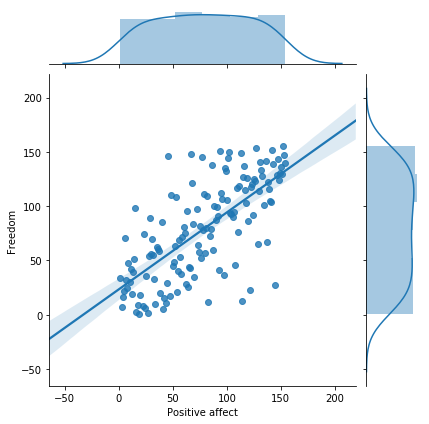

In [132]:
sns.jointplot(x='Positive affect', y='Freedom', 
              data=df_d, kind='reg')

### Уже лучше, выбросов нет, расчеты похожи на правду

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

0.6965670458090686

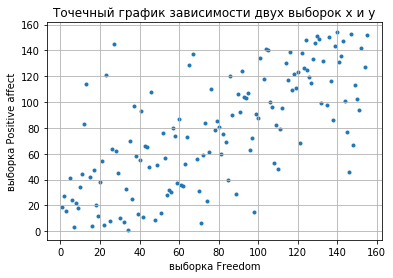

In [133]:
# plt.plot(df['Freedom'], df['Positive affect'], 'b.')
# plt.show()

duration = df_d['Freedom']
avg_vote = df_d['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

corr, value = pearsonr(duration, avg_vote)
corr

### Можно увидеть средне - сильную корреляцию между 'Freedom' и 'Positive affect' = 0.69

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [108]:
# duration = df_d['Freedom']
# print(statistics.mean(duration))

# duration_1 = duration - statistics.mean(duration)
# print(statistics.mean(duration_1))

# min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
# duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
# print(min(duration_2))
# print(max(duration_2))

In [134]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df_d[['Freedom', 'Positive affect']])
df_norm = pd.DataFrame(np_scaled)

print(df_norm[:5])

          0         1
0  0.025974  0.261438
1  0.032468  0.150327
2  0.012987  0.098039
3  0.038961  0.013072
4  0.116883  0.071895


In [135]:
volume = df_norm[0]
bags = df_norm[1]

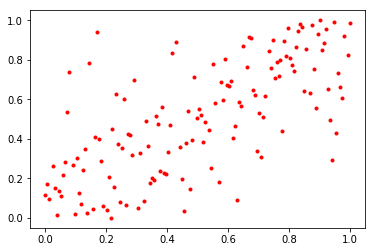

In [136]:
plt.xlabel('volume')
plt.ylabel('bags')
plt.plot(volume, bags, 'r.')
plt.show()

In [137]:
corr, p_value = pearsonr(volume, bags)
print(corr)

0.6965670458090686


Построить матрицу корреляций для всех колонок таблицы

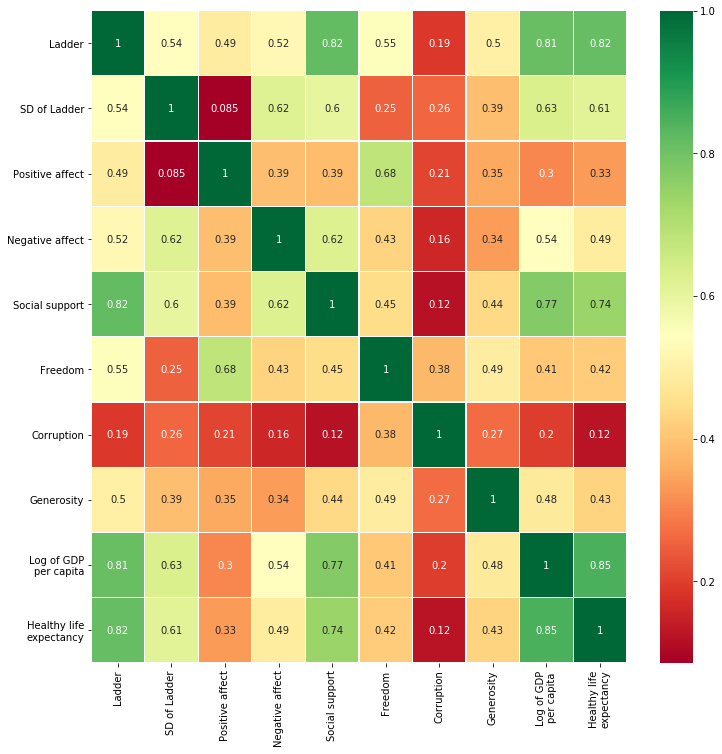

In [138]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

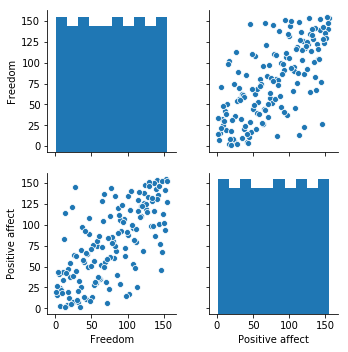

In [139]:
sns_plot = sns.pairplot(
    df[['Freedom', 'Positive affect']])

sns_plot

Загрузить следующую таблицу: 

In [140]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

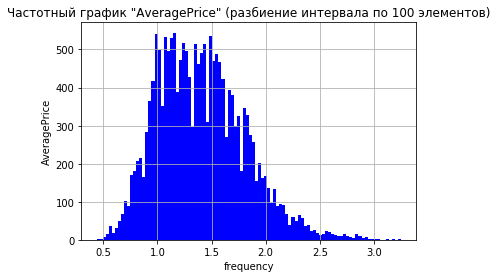

In [141]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график "AveragePrice" (разбиение интервала по 100 элементов)')
plt.grid()
plt.show()

### Распределение похоже на "Нормальное распределение"

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [142]:
corr, value = pearsonr(df['AveragePrice'], df['4046'])
corr

-0.20831704848788477

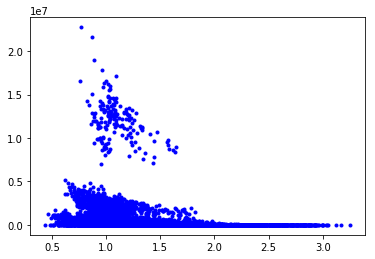

In [143]:
plt.plot(df['AveragePrice'], df['4046'], 'b.')
plt.show()

### Коэффициент корреляции = -0.20 между 'AveragePrice' и '4046' т.е. она настолько не значительна, что можно считать что ее нет

In [ ]:
pass